In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier,kneighbors_graph
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [3]:
df = pd.read_csv('../DATA/student_data.csv')
df = df[df["Output"] != "Enrolled"]
df
# df.head()
# df.describe()
# df_1st.head()

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


label encoder

In [4]:
le_enc = LabelEncoder()
scaler = StandardScaler()
df["Output"] = le_enc.fit_transform(df["Output"])
df["Output"]
# Dropout=0, Enrolled=1, Graduate=2

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Output, Length: 3630, dtype: int64

In [5]:
# features array
features = [
    "Age at enrollment",
    "Curricular units 1st sem (grade)",
    # "International",
    "Scholarship holder",
    # "Gender",
    # "Marital status",
    "Tuition fees up to date",
    "Debtor",
    "Curricular units 2nd sem (grade)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

X = df[features]
y = df["Output"]

X_scaled = scaler.fit_transform(X)

print(f"X shape: {X.shape}")
print(f"X shape: {X_scaled.shape}")
print(f"y shape: {y.shape}")

y

X shape: (3630, 9)
X shape: (3630, 9)
y shape: (3630,)


0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Output, Length: 3630, dtype: int64

In [6]:
# X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)
y_test

3734    0
13      1
2182    1
3939    1
2054    1
       ..
297     1
4410    1
630     1
688     1
37      0
Name: Output, Length: 726, dtype: int64

In [7]:
test_array = np.array([[-0.28668362,  0.13152872, 1,1,1,2,1,1, 0.32146467,  0.4010228 ,  4.78259971,-0.74822447],
                       [-0.38668362,  0.63152872,0,0,0,5,0,0, 0.62146467,  0.3010228 ,  10.78259971,-0.14822447],
                       [-0.48668362,  0.23152872, 1,1,0,1,1,1,0.42146467,  0.4010228 ,  6.78259971,-0.34822447],
                       [-0.38668362,  0.63152872, 1,1,0,3,1,1, 0.62146467,  0.3010228 ,  10.78259971,-0.54822447],
                       [-0.48668362,  0.53152872, 0,1,1,4,0,0, 0.62146467,  0.4010228 ,  6.78259971,-0.24822447]])

KNN

Confusion Matrix:
 [[201  83]
 [ 29 413]]

Classification Report:
               precision    recall  f1-score   support

    Graduate       0.87      0.71      0.78       284
     Dropout       0.83      0.93      0.88       442

    accuracy                           0.85       726
   macro avg       0.85      0.82      0.83       726
weighted avg       0.85      0.85      0.84       726

0.8457300275482094


<Axes: >

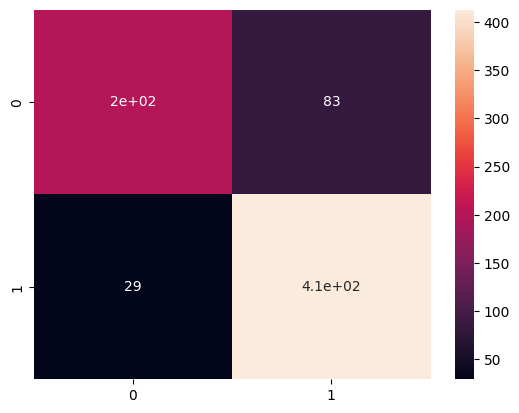

In [8]:
# K-th nearest neighbor
# def knn_model(X_train,X_test,y_train,y_test,test_array=None):
knn = KNeighborsClassifier(n_neighbors=10,metric='minkowski')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Graduate','Dropout']))
# pred = knn.predict(test_array)
# print(pred)
print(knn.fit(X_train,y_train).score(X_test,y_test))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# knn_model(X_train, X_test, y_train, y_test,test_array)

Naive bayes

Confusion Matrix:
 [[194  90]
 [ 34 408]]

Classification Report:
               precision    recall  f1-score   support

    Graduate       0.85      0.68      0.76       284
     Dropout       0.82      0.92      0.87       442

    accuracy                           0.83       726
   macro avg       0.84      0.80      0.81       726
weighted avg       0.83      0.83      0.82       726



<Axes: >

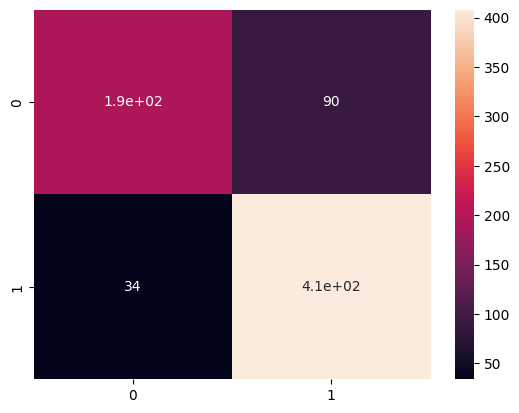

In [9]:
# naive bayes
NV_bayes = GaussianNB()
NV_bayes.fit(X_train,y_train)
y_pred = NV_bayes.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Graduate','Dropout']))
# pred = NV_bayes.predict(test_array)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# print(pred)

Logistic regression

Confusion Matrix:
 [[184 100]
 [ 23 419]]

Classification Report:
               precision    recall  f1-score   support

    Graduate       0.89      0.65      0.75       284
     Dropout       0.81      0.95      0.87       442

    accuracy                           0.83       726
   macro avg       0.85      0.80      0.81       726
weighted avg       0.84      0.83      0.82       726



<Axes: >

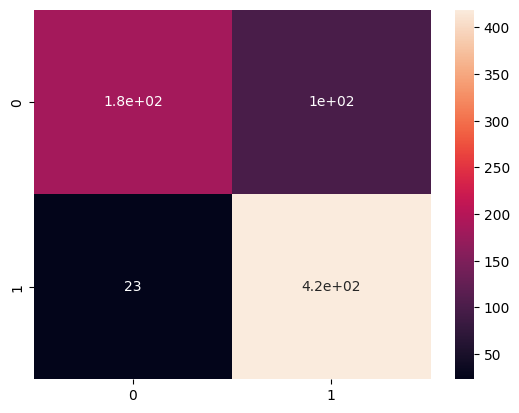

In [10]:
lg_reg = LogisticRegression(solver='lbfgs')
lg_reg.fit(X_train,y_train)
y_pred = lg_reg.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Graduate','Dropout']))
# pred = lg_reg.predict(test_array)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# print(pred)

Decision trees and random forest

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

train error: 0.13085399449035812, test_error: 0.14049586776859505
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       284
           1       0.87      0.90      0.89       442

    accuracy                           0.86       726
   macro avg       0.85      0.85      0.85       726
weighted avg       0.86      0.86      0.86       726



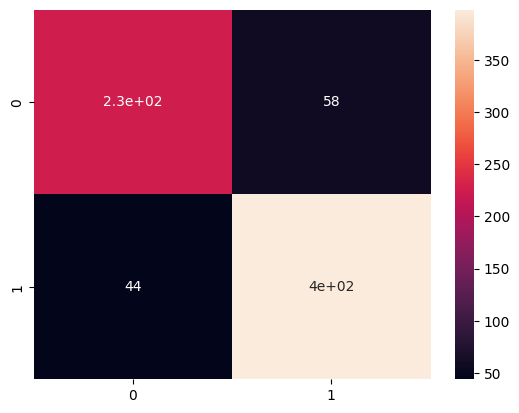

In [35]:
dts = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
dts.fit(X_train,y_train)
y_pred_test = dts.predict(X_test)
y_pred_train = dts.predict(X_train)
# own_pred = dts.predict(test_array)
class_rep = classification_report(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
train_error = mean_squared_error(y_train,y_pred_train)
test_error = mean_squared_error(y_test,y_pred_test)
# print(dts.fit(X_train,y_train).score(X_test,y_test))
# print(confusion_matrix(y_test,y_pred))

print(f"train error: {train_error}, test_error: {test_error}")
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)
print(classification_report(y_test, y_pred_test))



              precision    recall  f1-score   support

           0       0.87      0.77      0.82       284
           1       0.86      0.93      0.89       442

    accuracy                           0.87       726
   macro avg       0.87      0.85      0.86       726
weighted avg       0.87      0.87      0.86       726
 [[219  65]
 [ 33 409]]


<Axes: >

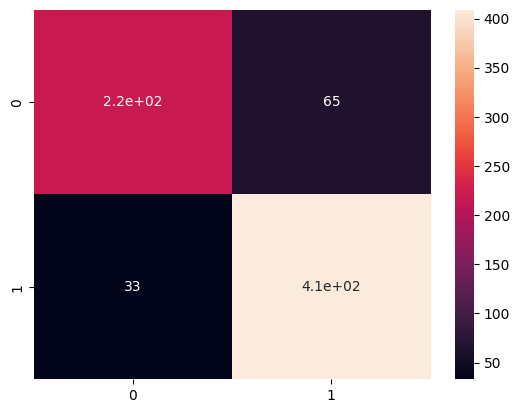

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=3000, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred),confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

graph


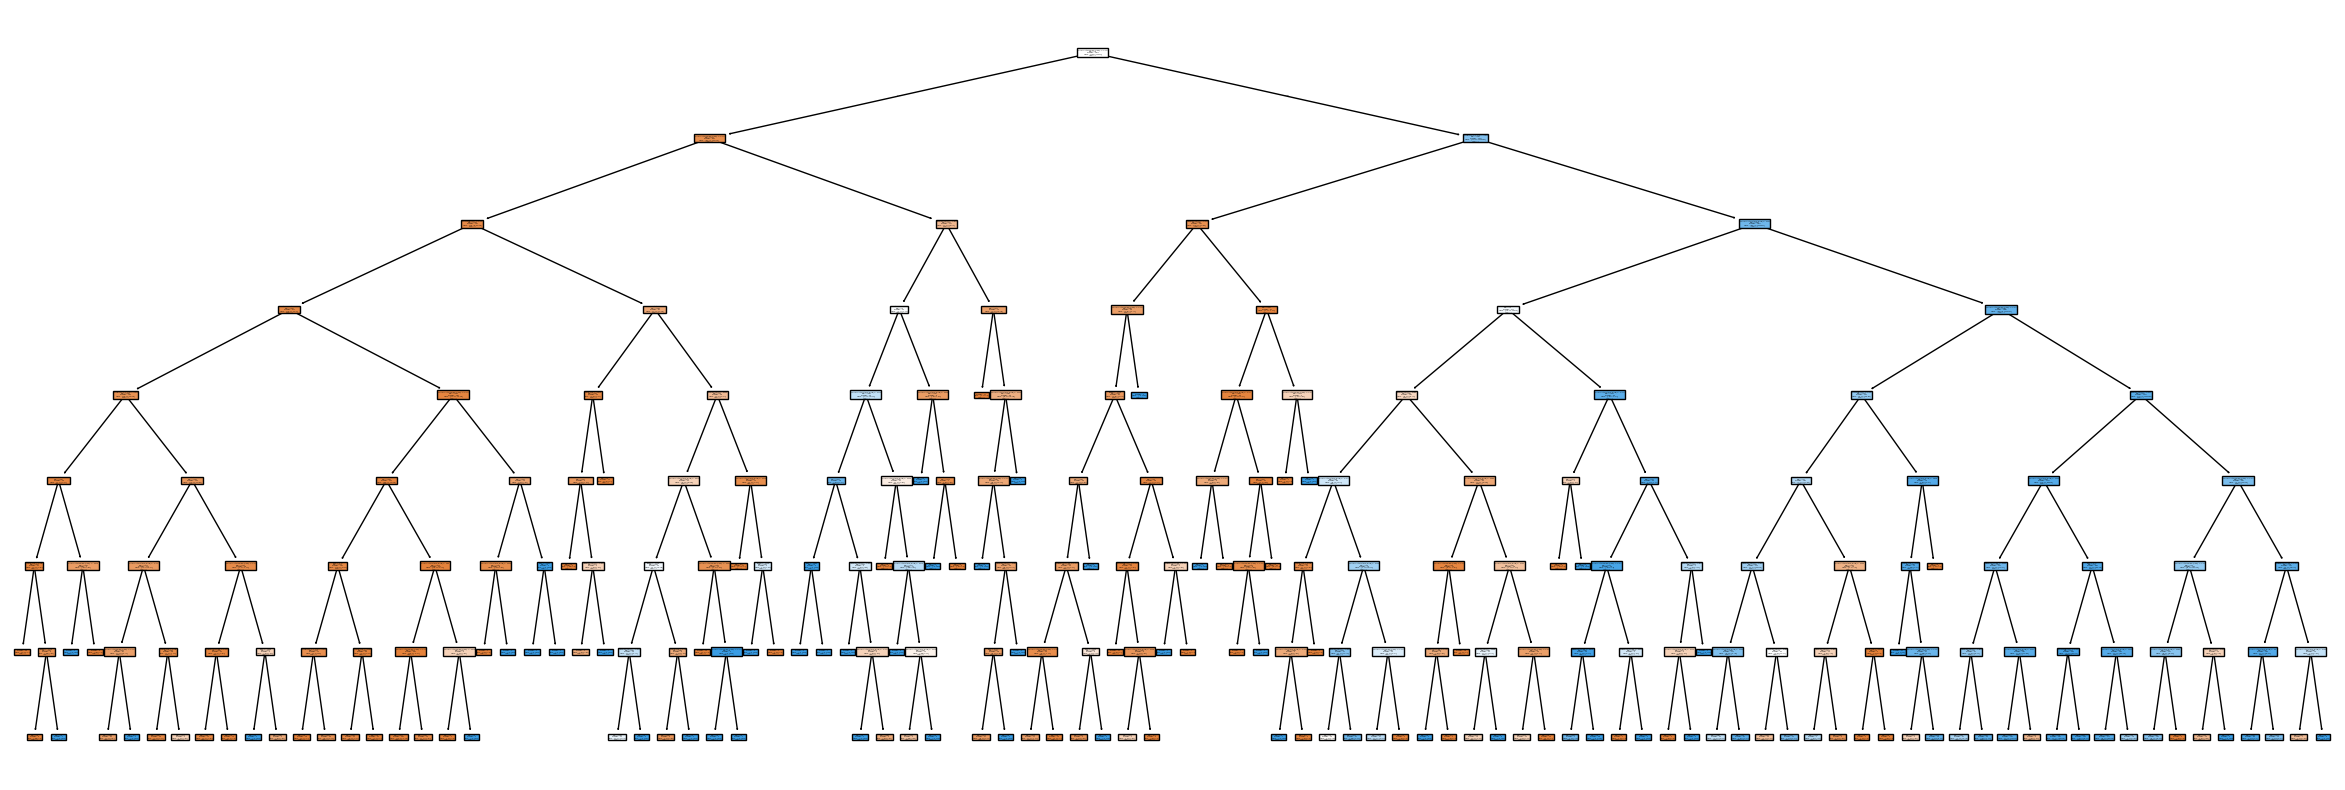

In [79]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Your trained model: dts
plt.figure(figsize=(30,10))  # Size can be adjusted
plot_tree(dts, 
          filled=True, 
          feature_names=features,  # This uses column names from training
          class_names=dts.classes_.astype(str))  # Convert classes to strings
plt.show()



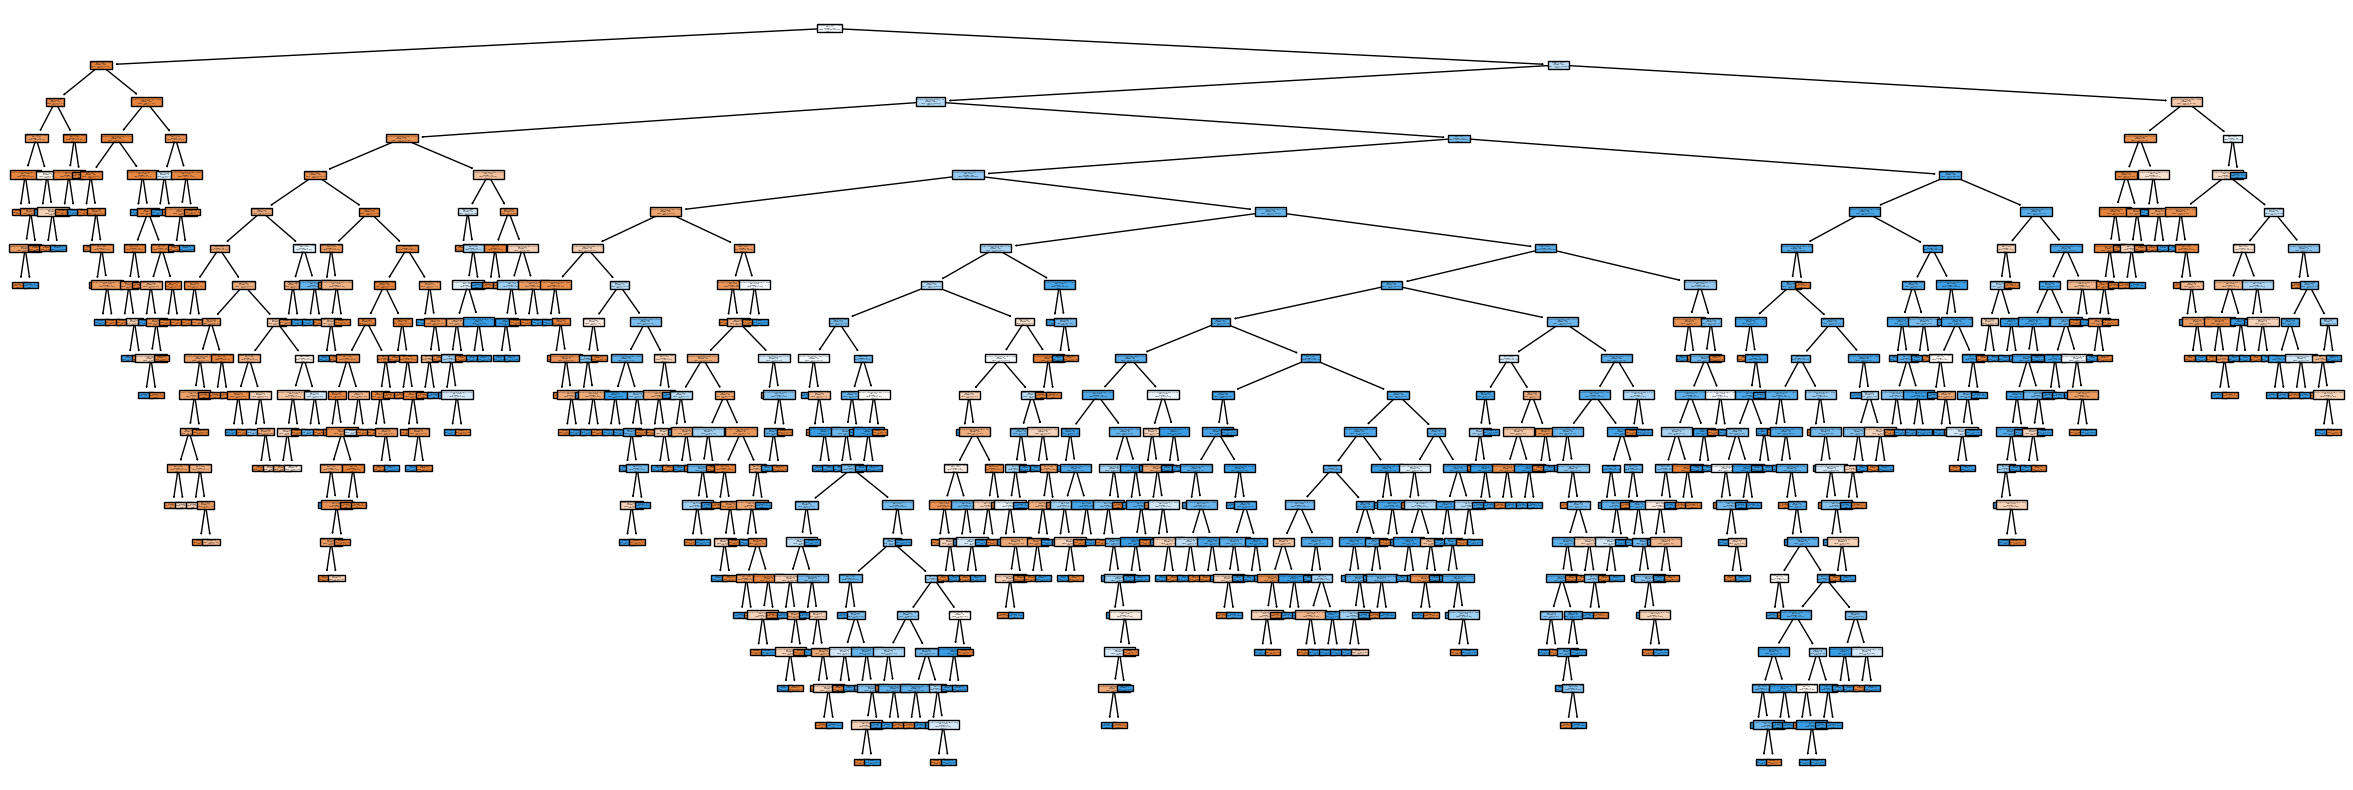

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Your trained model: clf
# Your feature names: features

# Select one tree from the forest (e.g., the first one)
estimator = clf.estimators_[0]

plt.figure(figsize=(30, 10))  # Adjust size as needed
plot_tree(estimator, 
          filled=True, 
          feature_names=features, 
          class_names=clf.classes_.astype(str))
plt.show()


In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [36]:
# Get predicted probabilities
 # 1 = positive class (Dropout)

y_score_log = lg_reg.predict_proba(X_test)[:, 1]
y_score_knn = knn.predict_proba(X_test)[:, 1]
y_score_nb = NV_bayes.predict_proba(X_test)[:, 1]
y_score_dts = dts.predict_proba(X_test)[:, 1]
y_score_clf = clf.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_score_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_dts, tpr_dts, _ = roc_curve(y_test, y_score_dts)
roc_auc_dts = auc(fpr_dts, tpr_dts)

fpr_clf, tpr_clf, _ = roc_curve(y_test, y_score_clf)
roc_auc_clf = auc(fpr_clf, tpr_clf)

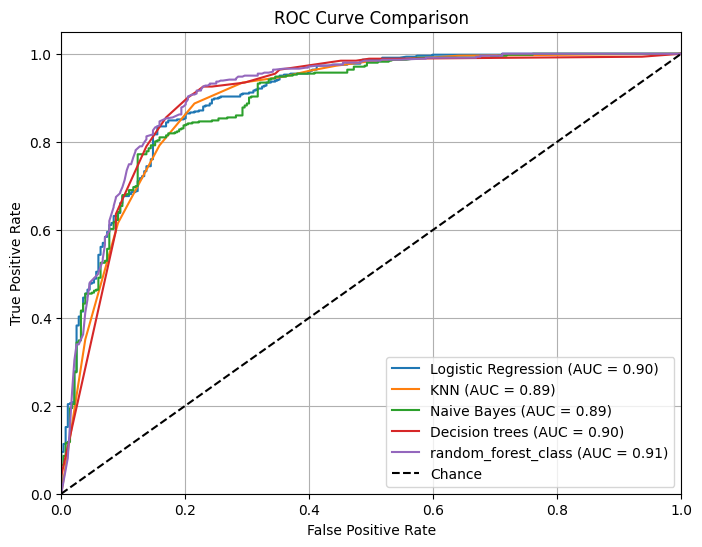

In [37]:
plt.figure(figsize=(8, 6))

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_dts, tpr_dts, label=f'Decision trees (AUC = {roc_auc_dts:.2f})')
plt.plot(fpr_clf, tpr_clf, label=f'random_forest_class (AUC = {roc_auc_clf:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid()
plt.show()


C:\Users\ADMIN777\AppData\Local\Temp\ipykernel_15296\1751706558.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


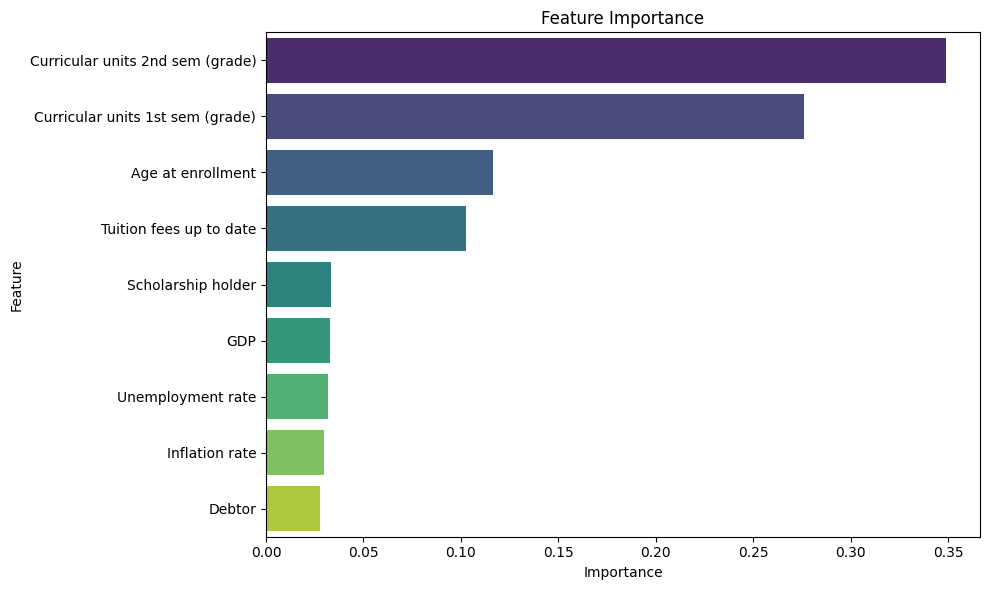

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Train your model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


# Create a DataFrame for feature importances
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
